In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
data_path = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset"
labels = [name for name in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, name))]

In [9]:
img_list = []
label_list = []

for label in labels:
    folder_path = os.path.join(data_path, label)
    for img_file in os.listdir(folder_path):
        img_list.append(os.path.join(folder_path, img_file))
        label_list.append(label)

df = pd.DataFrame({"img": img_list, "label": label_list})
df["encode_label"] = df["label"].map({label: idx for idx, label in enumerate(labels)})

# Karıştır
df = df.sample(frac=1).reset_index(drop=True)


In [ ]:
size = 64
X = []

for img_path in df["img"]:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (size, size))
    img = img / 255.0
    X.append(img)

X = np.array(X)
y = to_categorical(df["encode_label"], num_classes=len(labels))


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(size, size, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 232s 122ms/step - accuracy: 0.8999 - loss: 0.2680 - val_accuracy: 0.9748 - val_loss: 0.0749
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 218s 116ms/step - accuracy: 0.9725 - loss: 0.0885 - val_accuracy: 0.9877 - val_loss: 0.0390
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 263s 117ms/step - accuracy: 0.9833 - loss: 0.0537 - val_accuracy: 0.9912 - val_loss: 0.0266
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 261s 116ms/step - accuracy: 0.9868 - loss: 0.0435 - val_accuracy: 0.9934 - val_loss: 0.0216
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 276s 124ms/step - accuracy: 0.9916 - loss: 0.0273 - val_accuracy: 0.9939 - val_loss: 0.0209


469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9935 - loss: 0.0212
Test Accuracy: 0.9939
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step
              precision    recall  f1-score   support

   Karacadag       1.00      0.99      0.99      2970
     Basmati       1.00      0.99      0.99      3008
     Jasmine       0.99      0.99      0.99      3003
     Arborio       0.98      1.00      0.99      3052
      Ipsala       1.00      1.00      1.00      2967

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



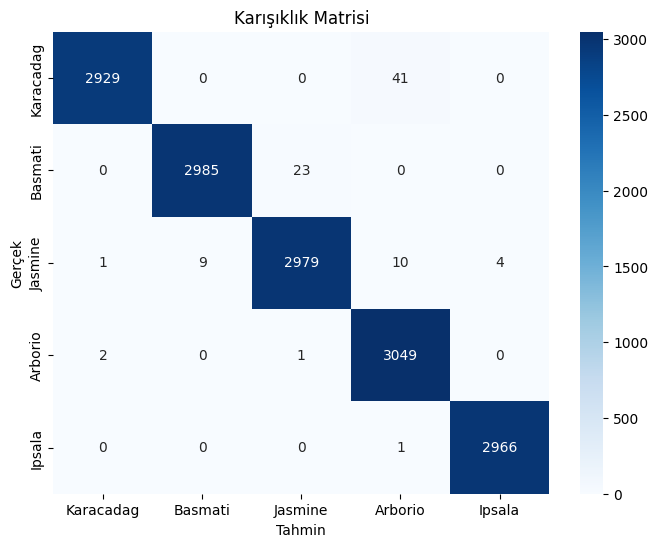

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.show()


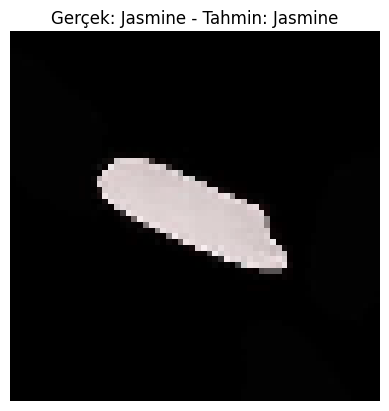

In [17]:
i = 0
plt.imshow(X_test[i])
plt.title(f"Gerçek: {labels[y_true[i]]} - Tahmin: {labels[y_pred[i]]}")
plt.axis('off')
plt.show()


In [18]:
model.save("/kaggle/working/rice_model.h5")
